# Load and process molecules with `rdkit`

This notebook does the following:
- Molecules downloaded in the [previous notebook](./ 1_Get_Molecular_libraries.ipynb) are processed using `rdkit`.

The output of this notebook is a the file `rdKit_db_molecules.obj`, which is a pandas data frame containing the rdkit object of each molecule.

In [1]:
import pandas as pd
import numpy as np
from glob import glob
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
import sys
sys.path.append('../..')
from helper_modules.analyze_molecules_with_rdkit import *

## DEKOIS Molecules

In [2]:
sdf_input_path = './datasets/DEKOIS2/sdf/'

list_sdf_files = get_files_list(sdf_input_path, actives_name='ligand')
list_sdf_files
df_DEKOIS = get_mol_dataframe(load_molecules_from_dir(list_sdf_files))
df_DEKOIS.head()

,Activity,mol_rdk,sanitized
ligand_1,active,<rdkit.Chem.rdchem.Mol object at 0x7f9f0d0db7b0>,True
ligand_2,active,<rdkit.Chem.rdchem.Mol object at 0x7f9f0d0db850>,True
ligand_3,active,<rdkit.Chem.rdchem.Mol object at 0x7f9f0d0db8a0>,True
ligand_4,active,<rdkit.Chem.rdchem.Mol object at 0x7f9f0d0db8f0>,True
ligand_5,active,<rdkit.Chem.rdchem.Mol object at 0x7f9f0d0db940>,True


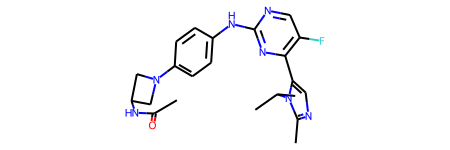

In [3]:
df_DEKOIS.loc['ligand_4', 'mol_rdk']

## DUD 2006

In [4]:
sdf_input_path = './datasets/DUD/sdf/'

list_sdf_files = get_files_list(sdf_input_path, actives_name='ligand')
df_DUD = get_mol_dataframe(load_molecules_from_dir(list_sdf_files))
df_DUD.head()

,Activity,mol_rdk,sanitized
ligand_1,active,<rdkit.Chem.rdchem.Mol object at 0x7f9f0d123e40>,True
ligand_2,active,<rdkit.Chem.rdchem.Mol object at 0x7f9f0d123da0>,True
ligand_3,active,<rdkit.Chem.rdchem.Mol object at 0x7f9f0d123d00>,True
ligand_4,active,<rdkit.Chem.rdchem.Mol object at 0x7f9f0d123c60>,True
ligand_5,active,<rdkit.Chem.rdchem.Mol object at 0x7f9f0d123bc0>,True


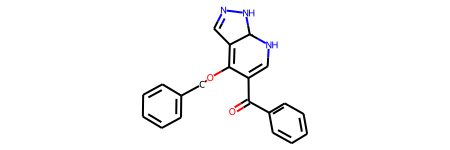

In [5]:
df_DUD.loc['ligand_4', 'mol_rdk']

## CSAR 2012 molecules

In [6]:
sdf_input_path = './datasets/CSAR/sdf/'

# Function to sort the molecules alphanumerically
sort_function = lambda x: int(x.split('CS')[-1].split('.sdf')[0])
# Get the list of files
list_sdf_files = get_files_list(sdf_input_path, 
                                actives_name = '',
                                inactives_name = '',
                                sort_func = sort_function
                               )
# Get the dataframe with the rdkit objects
df_CSAR = get_mol_dataframe(load_molecules_from_dir(list_sdf_files))

# The `Activity` column is not correct, we will update it
df_CSAR = df_CSAR.drop('Activity', axis = 1)
df_CSAR.index = df_CSAR.index.set_names(['Compound_ID'])
df_CSAR = df_CSAR.reset_index()

# Include information about activity of the molecule
csar_dat_file = (f'./datasets/CSAR/csar_dataset.csv') # Created in the previous notebook
csar_data = pd.read_csv(csar_dat_file)

# homogenize the df format
df_CSAR = df_CSAR.merge(csar_data[['Compound_ID', 'activity']], on = 'Compound_ID')
df_CSAR = df_CSAR.rename(columns = {'Compound_ID': 'Lig', 'activity': 'Activity'})
df_CSAR = df_CSAR.set_index('Lig')
df_CSAR = df_CSAR[['Activity', 'mol_rdk', 'sanitized']]
df_CSAR.head()

,Activity,mol_rdk,sanitized
Lig,,,
CS1,1,<rdkit.Chem.rdchem.Mol object at 0x7f9f0d1848a0>,True
CS2,1,<rdkit.Chem.rdchem.Mol object at 0x7f9f0d184a80>,True
CS3,1,<rdkit.Chem.rdchem.Mol object at 0x7f9f0d184940>,True
CS4,1,<rdkit.Chem.rdchem.Mol object at 0x7f9f0d123f80>,True
CS5,0,<rdkit.Chem.rdchem.Mol object at 0x7f9f0d127120>,True


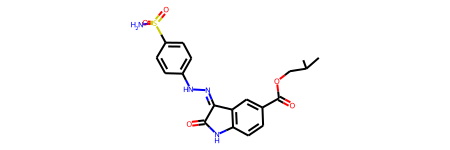

In [7]:
df_CSAR.loc['CS262', 'mol_rdk']

## Cocrystalized molecules

In [8]:
# Path to SDF Files
sdf_input_path = './datasets/COCRYS/sdf/'
# Function to sort the molecules by their PDB id
sort_function = lambda x: x.split('/')[-1].split('_')[0]
# Get the list of files
list_sdf_files = get_files_list(sdf_input_path, 
                                actives_name='LIG', 
                                sufix='', 
                                sort_func = sort_function
                               )
# Compute a dataframe with the molecules as rdkit objects
df_pdi_lig = load_cocrys_molecules_from_dir(list_sdf_files)

# Update the dataframe
df_COCRYS = df_pdi_lig[['Lig', 'mol_rdk']]
df_COCRYS['Activity'] = 'active'
df_COCRYS['sanitized'] = [True if i != 'v3' else False for i in df_pdi_lig.validation]
df_COCRYS = df_COCRYS[['Lig', 'Activity', 'mol_rdk', 'sanitized']]
df_COCRYS = df_COCRYS.drop_duplicates('Lig').set_index('Lig')
df_COCRYS.sanitized.value_counts()
print('Shape', df_COCRYS.shape)
df_COCRYS.head()

Shape (315, 3)


,Activity,mol_rdk,sanitized
Lig,,,
STU,active,<rdkit.Chem.rdchem.Mol object at 0x7f9f0e544f80>,True
ATP,active,<rdkit.Chem.rdchem.Mol object at 0x7f9f0e544ee0>,True
PVB,active,<rdkit.Chem.rdchem.Mol object at 0x7f9f0e544da0>,True
DTQ,active,<rdkit.Chem.rdchem.Mol object at 0x7f9f0e544d00>,True
HMD,active,<rdkit.Chem.rdchem.Mol object at 0x7f9f0e544620>,False


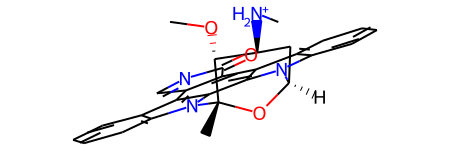

In [9]:
df_COCRYS.loc['STU', 'mol_rdk']

## Merge all dataframes

In [10]:
input_file = './rdKit_db_molecules.obj'
df_mols = pd.read_pickle(input_file)

df_mols.keys()

Index(['Activity', 'mol_rdk', 'sanitized'], dtype='object')

In [12]:
list_dfs = [df_COCRYS, df_DEKOIS, df_DUD]
list_dfs_names = ['COCRYS', 'DEKOIS2', 'DUD']

# Create the final dataframe
df_all_libraries = pd.concat(list_dfs, keys = list_dfs_names)
df_all_libraries['Activity'] = df_all_libraries['Activity']\
                                    .replace({'active': 1, 'inactive': 0})

df_all_libraries

Activity                                           mol_rdk  \
       Lig                                                                      
COCRYS STU                1  <rdkit.Chem.rdchem.Mol object at 0x7f9f0e544f80>   
       ATP                1  <rdkit.Chem.rdchem.Mol object at 0x7f9f0e544ee0>   
       PVB                1  <rdkit.Chem.rdchem.Mol object at 0x7f9f0e544da0>   
       DTQ                1  <rdkit.Chem.rdchem.Mol object at 0x7f9f0e544d00>   
       HMD                1  <rdkit.Chem.rdchem.Mol object at 0x7f9f0e544620>   
...                     ...                                               ...   
DUD    decoy_2070         0  <rdkit.Chem.rdchem.Mol object at 0x7f9f0e565350>   
       decoy_2071         0  <rdkit.Chem.rdchem.Mol object at 0x7f9f0e5653f0>   
       decoy_2072         0  <rdkit.Chem.rdchem.Mol object at 0x7f9f0e565490>   
       decoy_2073         0  <rdkit.Chem.rdchem.Mol object at 0x7f9f0e565530>   
       decoy_2074         0  <rdkit.Chem.rdchem.Mol object at 0x7f9f0e5655d0>   

                  sanitized  
       Lig                   
COCRYS STU             True  
       ATP             True  
       PVB             True  
       DTQ             True  
       HMD            False  
...                     ...  
DUD    decoy_2070     False  
       decoy_2071     False  
       decoy_2072     False  
       decoy_2073     False  
       decoy_2074     False  

[3701 rows x 3 columns]

In [13]:
# Save the dataframe
output_file = './rdKit_db_molecules.obj'
if not Path(output_file).exists():
    df_all_libraries.to_pickle(output_file)